## Прогнозирование временных рядов</center></h2>

In [1]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 474 kB 13.6 MB/s 
     |████████████████████████████████| 9.8 MB 53.4 MB/s 
     |████████████████████████████████| 11.2 MB 65.7 MB/s 
     |████████████████████████████████| 718 kB 63.6 MB/s 
     |████████████████████████████████| 930 kB 55.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is inco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 14.4 MB/s 
     |████████████████████████████████| 179 kB 70.1 MB/s 
     |████████████████████████████████| 73 kB 3.4 MB/s 
     |████████████████████████████████| 45 kB 4.1 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.4 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev

In [2]:
%matplotlib inline
!pip install matplotlib==3.1.3

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 12.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbit-ml 1.1.2 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!wget https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Imports%20Crude%20Oil.csv # monthly 
!wget https://github.com/rishabh89007/Time_Series_Datasets/raw/main/Nuclear%20Capacity.csv # daily 

--2022-07-04 18:38:48--  https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Imports%20Crude%20Oil.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2562 (2.5K) [text/plain]
Saving to: ‘Imports Crude Oil.csv’

Imports Crude Oil.c 100%[===================>]   2.50K  --.-KB/s    in 0s      

2022-07-04 18:38:48 (40.2 MB/s) - ‘Imports Crude Oil.csv’ saved [2562/2562]

--2022-07-04 18:38:48--  https://github.com/rishabh89007/Time_Series_Datasets/raw/main/Nuclear%20Capacity.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Nuclear%20Capa

In [4]:
ts1 = pd.read_csv("Imports Crude Oil.csv")
ts2 = pd.read_csv("Nuclear Capacity.csv")

In [5]:
print(ts1.columns)

print(ts2.columns)

Index(['Unnamed: 0', 'Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)'], dtype='object')
Index(['Unnamed: 0', 'U.S. nuclear capacity, daily (Megawatts)'], dtype='object')


In [6]:
ts1 = ts1.rename(columns={'Unnamed: 0': 'month', 'Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)': 'imports_oil_target'})
ts2 = ts2.rename(columns={'Unnamed: 0': 'day', 'U.S. nuclear capacity, daily (Megawatts)': 'nuclear_cpacity_target'})

ts1.month = pd.DatetimeIndex(ts1.month) # меняю формат данных месяца
ts2.day = ts2.day.map(lambda x: str(x)[0:7] + ' ' + str(x)[7:9]) # меняю формат данных дней ручками
ts2.day = pd.DatetimeIndex(ts2.day)

In [7]:
ts1

,month,imports_oil_target
0,2009-01-01,317275
1,2009-02-01,262339
2,2009-03-01,303897
3,2009-04-01,285934
4,2009-05-01,281147
...,...,...
140,2020-09-01,161926
141,2020-10-01,164494
142,2020-11-01,168655
143,2020-12-01,178597


In [8]:
ts2

,day,nuclear_cpacity_target
0,2007-01-01,101764.9
1,2007-01-02,101764.9
2,2007-01-03,101764.9
3,2007-01-04,101764.9
4,2007-01-05,101764.9
...,...,...
5220,2021-04-17,96434.9
5221,2021-04-18,96434.9
5222,2021-04-19,96434.9
5223,2021-04-20,96434.9


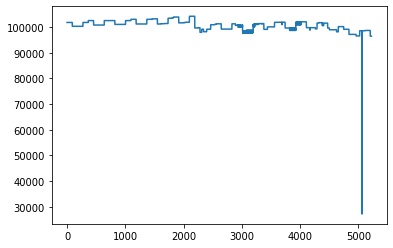

In [9]:
ts2.nuclear_cpacity_target.plot()

Дневной временной ряд имеет выбросы, которые необходимо усреднить для релевантного предсказания.

In [10]:
pyb = ts2.sort_values(by = "nuclear_cpacity_target")
pyb["nuclear_cpacity_target"][0:20] # видно, что у нас 6 выбросов

5063    27239.6
5062    27239.6
5061    27239.6
5060    27239.6
5064    27239.6
5059    84897.1
5224    96434.9
5204    96434.9
5205    96434.9
5206    96434.9
5207    96434.9
5208    96434.9
5209    96434.9
5223    96434.9
5211    96434.9
5210    96434.9
5218    96434.9
5219    96434.9
5220    96434.9
5221    96434.9
Name: nuclear_cpacity_target, dtype: float64

In [11]:
mn2 = ts2.nuclear_cpacity_target[ts2.nuclear_cpacity_target > 85000].mean() 
ts2.loc[(ts2.nuclear_cpacity_target < 85000), 'nuclear_cpacity_target'] = mn2 # заменяю выбросы на среднее значение
mn2

100684.26372868367

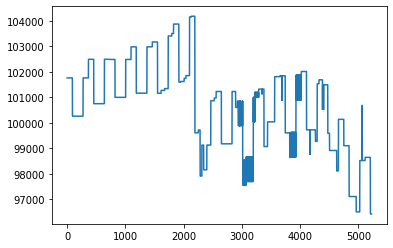

In [12]:
ts2.nuclear_cpacity_target.plot()

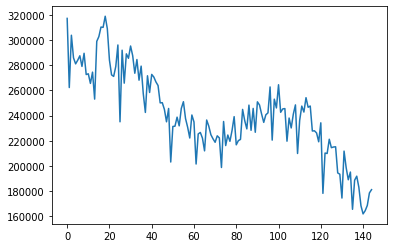

In [13]:
ts1.imports_oil_target.plot()

In [14]:
from sklearn.model_selection import train_test_split
ts1.index = pd.PeriodIndex(ts1.month, freq="D")
ts2.index = pd.PeriodIndex(ts2.day, freq="D")

X1_train, X1_test, y1_train, y1_test = train_test_split(ts1.month , ts1.imports_oil_target, test_size=0.2, shuffle = False) # делю месячные данные на трейн и тест

X2_train, X2_test, y2_train, y2_test = train_test_split(ts2.day , ts2.nuclear_cpacity_target, test_size=0.2, shuffle = False) # делю дневные данные на трейн и тест

Отрисую временные ряды. В случае присутствия сезонности, разбью временные ряды на повторяющиеся фрагменты и нарисую их наложенными для иллюстрации этой сезонности.

In [15]:
X1_train, X1_test, X2_train, X2_test = X1_train.sort_index(), X1_test.sort_index(), X2_train.sort_index(), X2_test.sort_index()
y1_train, y1_test, y2_train, y2_test = y1_train.sort_index(), y1_test.sort_index(), y2_train.sort_index(), y2_test.sort_index()

y1_train

month
2009-01-01    317275
2009-02-01    262339
2009-03-01    303897
2009-04-01    285934
2009-05-01    281147
               ...  
2018-04-01    247608
2018-05-01    242857
2018-06-01    254283
2018-07-01    246671
2018-08-01    247656
Freq: D, Name: imports_oil_target, Length: 116, dtype: int64

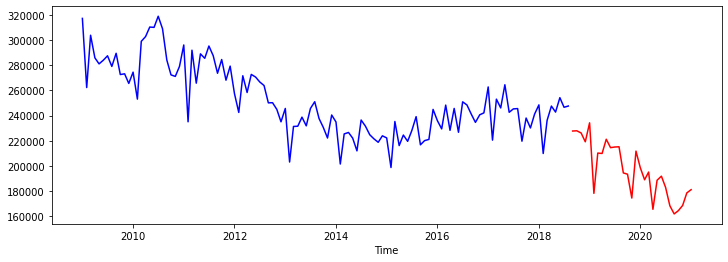

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(X1_train, y1_train, "b")
plt.plot(X1_test, y1_test, "r")
plt.xlabel('Time')
plt.show()

In [17]:
x = ts1.imports_oil_target - ts1.imports_oil_target.mean()
acf1 = np.correlate(x, x, mode = "full")
acf1 = acf1[int(acf1.size/2):] / (ts1.imports_oil_target.var() * ts1.shape[0]) # считаю acf по временным данным
acf1

array([ 9.93103448e-01,  8.18936961e-01,  8.30062682e-01,  7.60711789e-01,
        7.27919811e-01,  6.93925063e-01,  6.31808089e-01,  6.31268706e-01,
        6.07635028e-01,  5.87246798e-01,  5.61868631e-01,  5.41464233e-01,
        5.99047312e-01,  4.97649486e-01,  5.09747728e-01,  4.51599773e-01,
        4.17159944e-01,  3.76358144e-01,  3.17560728e-01,  3.00431889e-01,
        2.68781211e-01,  2.36580539e-01,  2.25793842e-01,  1.83674396e-01,
        2.29234010e-01,  1.28045575e-01,  1.48921300e-01,  9.49588554e-02,
        9.27627572e-02,  6.24353948e-02,  2.23402736e-02,  2.89763231e-02,
        1.17405971e-02,  3.60734467e-03, -1.40784794e-02, -3.27457470e-02,
        3.34650418e-03, -4.64470605e-02, -3.86021477e-02, -6.18602019e-02,
       -5.65399419e-02, -7.70104845e-02, -1.07952830e-01, -9.65805407e-02,
       -9.97791376e-02, -9.32463118e-02, -8.66529288e-02, -1.08742695e-01,
       -4.18846449e-02, -9.47404220e-02, -6.01912681e-02, -6.12352027e-02,
       -4.32002491e-02, -

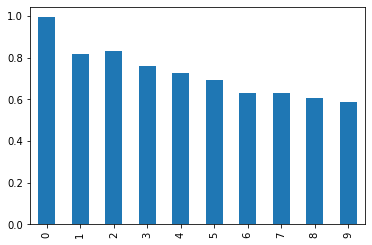

In [18]:
ACF1 = pd.Series(acf1[:10])
ACF1.plot(kind = "bar")

Функция экспоненциально затухает.

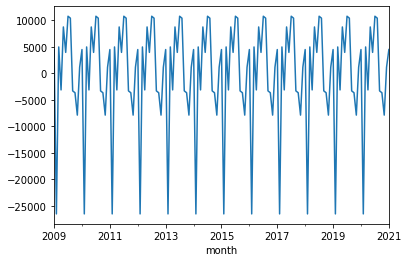

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts1_copy = ts1.copy()
ts1_copy.index = ts1_copy.index.to_timestamp()

decomposition = seasonal_decompose(ts1_copy.imports_oil_target, model = 'additive')
decomposition.seasonal.plot()

In [20]:
ts1_copy

,month,imports_oil_target
month,,
2009-01-01,2009-01-01,317275
2009-02-01,2009-02-01,262339
2009-03-01,2009-03-01,303897
2009-04-01,2009-04-01,285934
2009-05-01,2009-05-01,281147
...,...,...
2020-09-01,2020-09-01,161926
2020-10-01,2020-10-01,164494
2020-11-01,2020-11-01,168655


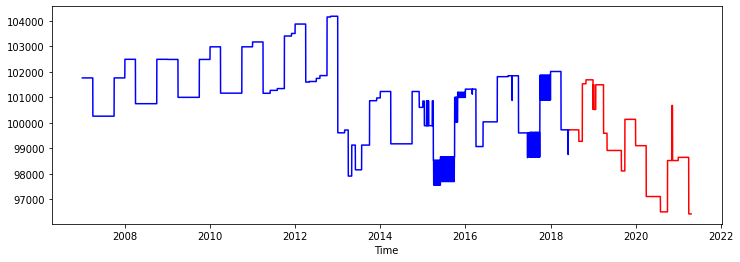

In [21]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(X2_train, y2_train, "b")
plt.plot(X2_test, y2_test, "r")
plt.xlabel('Time')
plt.show()

In [22]:
x = ts2.nuclear_cpacity_target - ts2.nuclear_cpacity_target.mean()
acf2 = np.correlate(x, x, mode = "full")
acf2 = acf2[int(acf2.size/2):] / (ts2.nuclear_cpacity_target.var() * ts2.shape[0]) # считаю acf по временным данным
acf2

array([ 9.99808612e-01,  9.89331764e-01,  9.79045428e-01, ...,
       -9.49092882e-04, -6.32728588e-04, -3.16364294e-04])

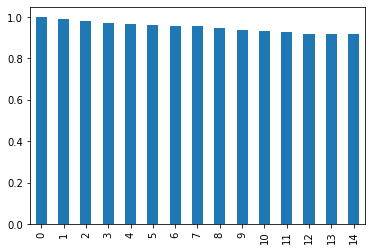

In [23]:
ACF2 = pd.Series(acf2[:15])
ACF2.plot(kind = "bar")

Здесь куда медленнее затухает acf.

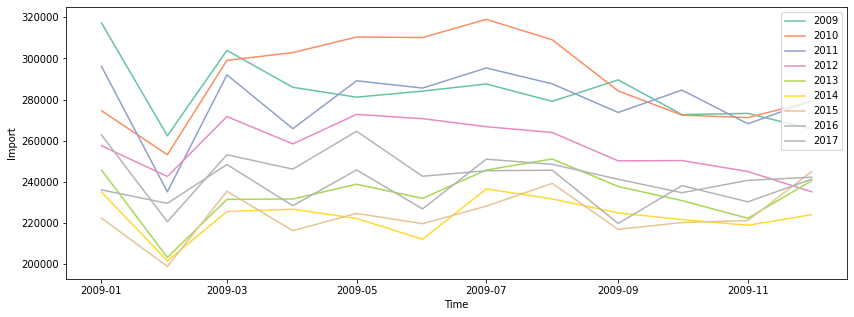

In [24]:
plt.figure(figsize = (14,5))

period = 12
for i in range(9):
  if 12 == period*(i+1)-period*i:
    plt.plot(X1_train[:period], y1_train[period*i: period*(i+1)], c = plt.cm.Set2(i), label = f"{2009+i}")

plt.xlabel("Time")
plt.ylabel("Import")

plt.legend()
plt.show()

### Предсказание месячного временного ряда

### ARIMA/AutoArima.

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

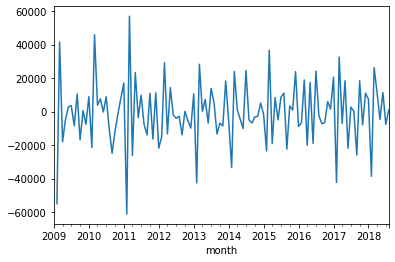

In [25]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

X11_train = pd.DataFrame()
# Рассчитаем лаги
X11_train["imports_oil_target_sh"] = y1_train.shift()

X11_train["imports_oil_target_dif"] = y1_train - X11_train.imports_oil_target_sh
X11_train.imports_oil_target_dif.plot()

### SARIMA(1, 1, 1)(1, 0, 0)[12] (ARIMA в sktime)


In [32]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

model_SARIMA_ts1 = ARIMA(order=(1,1,1), seasonal_order=(1, 0, 0, 12), suppress_warnings=True)
model_SARIMA_ts1.fit(y1_train)

ts1_pred_SARIMA = model_SARIMA_ts1.predict(fh = np.arange(1,len(X1_test)+1))
ts1_pred_SARIMA

2018-08-02    242360.223087
2018-08-03    245009.683978
2018-08-04    243136.950340
2018-08-05    244358.349298
2018-08-06    244908.896959
2018-08-07    238611.596994
2018-08-08    242039.818052
2018-08-09    243242.230783
2018-08-10    242014.873691
2018-08-11    243219.914528
2018-08-12    241563.829348
2018-08-13    241199.738774
2018-08-14    239891.858267
2018-08-15    239777.736295
2018-08-16    238984.171941
2018-08-17    238655.480819
2018-08-18    238225.995127
2018-08-19    236767.702394
2018-08-20    236770.555640
2018-08-21    236439.007469
2018-08-22    235742.414139
2018-08-23    235411.260660
2018-08-24    234650.255947
2018-08-25    234083.358545
2018-08-26    233374.667581
2018-08-27    232845.325071
2018-08-28    232213.904179
2018-08-29    231652.325129
2018-08-30    231075.602856
Freq: D, dtype: float64

In [33]:
X1_train

month
2009-01-01   2009-01-01
2009-02-01   2009-02-01
2009-03-01   2009-03-01
2009-04-01   2009-04-01
2009-05-01   2009-05-01
                ...    
2018-04-01   2018-04-01
2018-05-01   2018-05-01
2018-06-01   2018-06-01
2018-07-01   2018-07-01
2018-08-01   2018-08-01
Freq: D, Name: month, Length: 116, dtype: datetime64[ns]

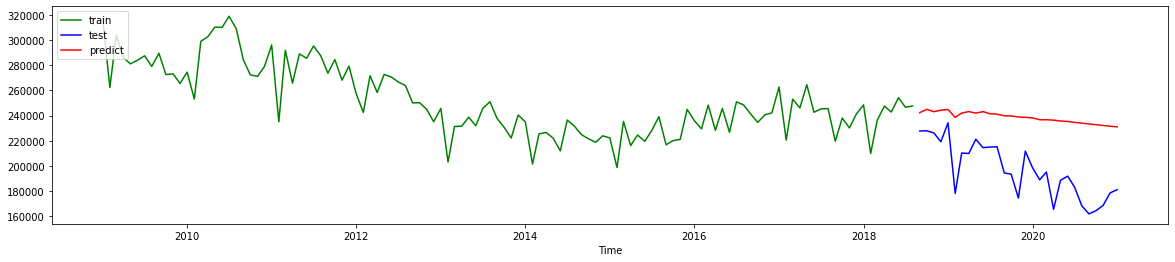

In [34]:
plt.figure(figsize=(20, 4))
plt.plot(X1_train, y1_train, 'g', label = "train")
plt.plot(X1_test, y1_test, 'b', label="test")
plt.plot(X1_test, ts1_pred_SARIMA, 'r', label="predict")
plt.legend(loc="upper left")
plt.xlabel('Time')
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error
model_SARIMA_MAE = mean_absolute_error(y1_test, ts1_pred_SARIMA)


Алгоритм Хиндмана-Хандакара подбора SARIMA (AutoARIMA в sktime)


In [37]:
model_AARIMA_ts1 = AutoARIMA(start_p=1, d=None, start_q=0, 
                       max_p=2, max_d=1, max_q=0, 
                       start_P=1, D=1, start_Q=0, 
                       max_P=1, max_D=1, max_Q=0, 
                       sp=12, suppress_warnings=True, stepwise=False, n_jobs=-1)

model_AARIMA_ts1.fit(y1_train)

model_AARIMA_ts1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  116
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -1132.135
Date:                            Mon, 04 Jul 2022   AIC                           2272.271
Time:                                    18:42:10   BIC                           2282.810
Sample:                                         0   HQIC                          2276.539
                                            - 116                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    349.2424   1270.360      0.275      0.783   -2140.618    2839.103
ar.L1         -0.2024      0.023     -8.900      0.000      -0.247      -0.158
ar.S.L12      -0.1068      0.025     -4.260      0.000      -0.156      -0.058
sigma2      1.776e+08      0.018   9.63e+09      0.000    1.78e+08    1.78e+08
===================================================================================
Ljung-Box (L1) (Q):                  12.83   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.00   Prob(JB):                         0.51
Heteroskedasticity (H):               0.63   Skew:                            -0.26
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.45e+27. Standard errors may be unstable.
"""

In [38]:
ts1_pred_AARIMA = model_AARIMA_ts1.predict(fh = np.arange(1,len(X1_test)+1))

ts1_intervals_AARIMA = model_AARIMA_ts1.predict_interval(coverage=0.9)

In [39]:
predicted_arima = pd.DataFrame()
predicted_arima['time'] = X1_test
predicted_arima['prediction_5'] = ts1_intervals_AARIMA[('Coverage', 0.9, 'lower')].values
predicted_arima['prediction'] = ts1_pred_AARIMA.values
predicted_arima['prediction_95'] = ts1_intervals_AARIMA[('Coverage', 0.9, 'upper')].values

predicted_arima.head()

,time,prediction_5,prediction,prediction_95
month,,,,
2018-09-01,2018-09-01,201965.082551,223882.487622,245799.892694
2018-10-01,2018-10-01,211904.884434,239940.240548,267975.596662
2018-11-01,2018-11-01,200307.481183,233830.355589,267353.229994
2018-12-01,2018-12-01,205979.617221,244123.286330,282266.955440
2019-01-01,2019-01-01,210861.793277,253139.866808,295417.940338


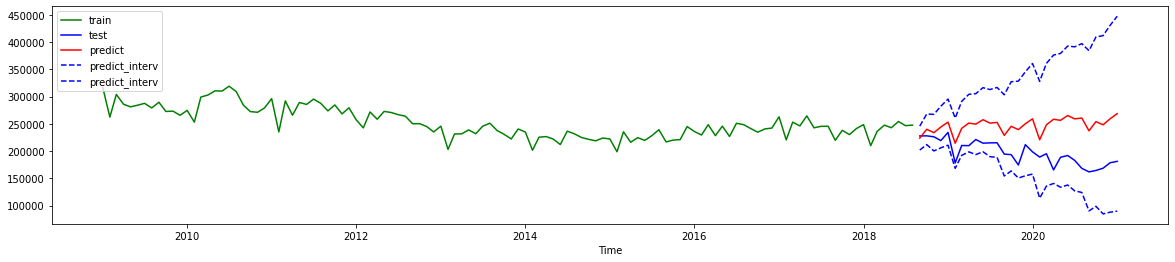

In [40]:
plt.figure(figsize=(20, 4))
plt.plot(X1_train, y1_train, 'g', label = "train")
plt.plot(X1_test, y1_test, 'b', label="test")
plt.plot(X1_test, predicted_arima.prediction, 'r', label="predict")
plt.plot(X1_test, predicted_arima.prediction_5, 'b--', X1_test, predicted_arima.prediction_95, 'b--', label="predict_interv")

plt.legend(loc="upper left")
plt.xlabel('Time')
plt.show()

In [42]:
model_AARIMA_MAE = mean_absolute_error(y1_test, ts1_pred_AARIMA)


### LGT/DLT.

### DLT

In [43]:
|from orbit.models import DLT

dlt = DLT(
    response_col='imports_oil_target', 
    date_col='month',
    seasonality=12,
    seed=12345,
    num_warmup=2000
)


train1 = pd.concat((X1_train, y1_train), axis = 1)

dlt.fit(train1)

test1 = pd.concat((X1_test, y1_test), axis = 1)
predicteddlt_1 = dlt.predict(test1)

predicteddlt_1.head()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_aec9f19b676e0ecff1bcca082962e24a NOW.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 500 and samples(per chain): 25.


,month,prediction_5,prediction,prediction_95
0,2018-09-01,212306.546464,231663.532397,253915.039837
1,2018-10-01,209453.157797,235095.135688,254340.559129
2,2018-11-01,202982.476390,233070.725209,259342.180659
3,2018-12-01,211927.384821,239068.911632,266926.116729
4,2019-01-01,213370.141069,241356.501380,270388.958057


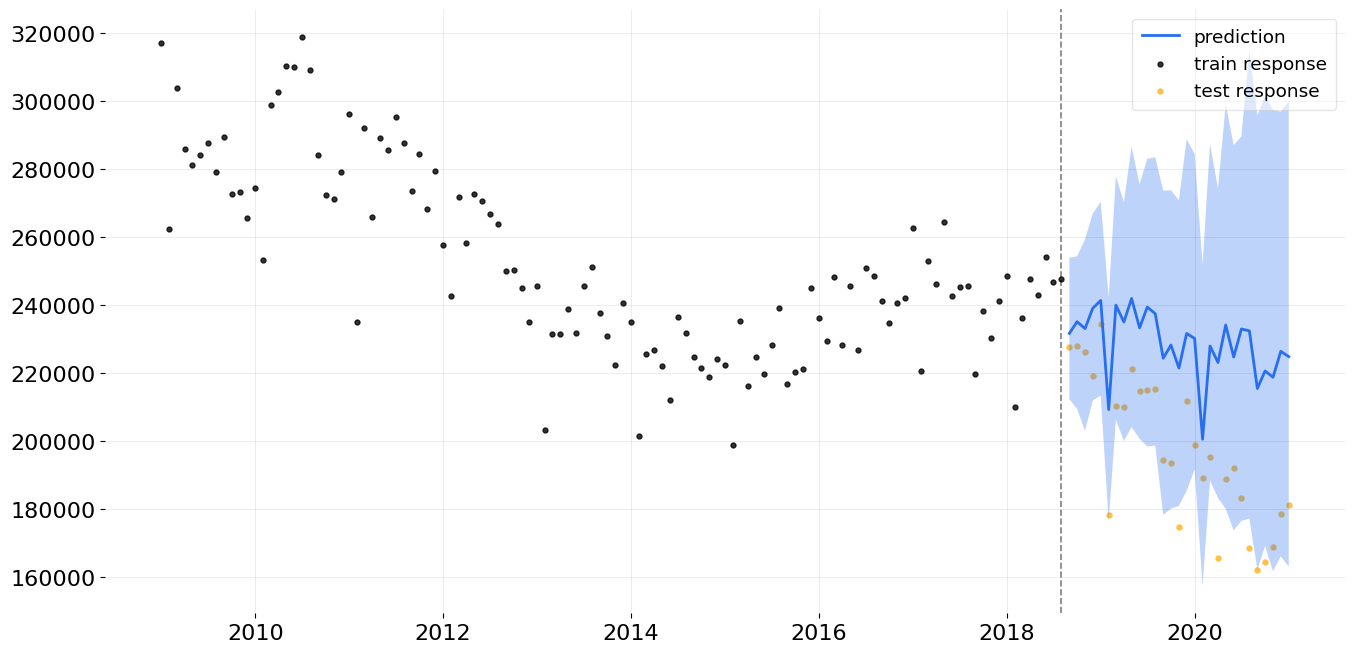

In [44]:
from orbit.diagnostics.plot import plot_predicted_data

plot_predicted_data(
    training_actual_df=train1, predicted_df=predicteddlt_1,
    date_col=dlt.date_col, actual_col=dlt.response_col,
    test_actual_df=test1
)

In [46]:
model_DLT_MAE = mean_absolute_error(y1_test, predicteddlt_1.prediction)


### LGT

In [47]:
from orbit.models import LGT

lgt = LGT(
    response_col='imports_oil_target',
    date_col='month',
    seasonality=12,
    seed=12345,
)

lgt.fit(train1)

predictedlgt = lgt.predict(test1)

predictedlgt.head()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_aea89cc15436811b43e6c7a717ca27b7 NOW.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


,month,prediction_5,prediction,prediction_95
0,2018-09-01,216083.779259,234371.992294,259971.957373
1,2018-10-01,215087.560139,240311.415987,260149.217820
2,2018-11-01,211843.829632,237869.171065,258891.455072
3,2018-12-01,215900.699321,242985.787817,271694.123800
4,2019-01-01,221860.973182,248828.465550,274709.181769


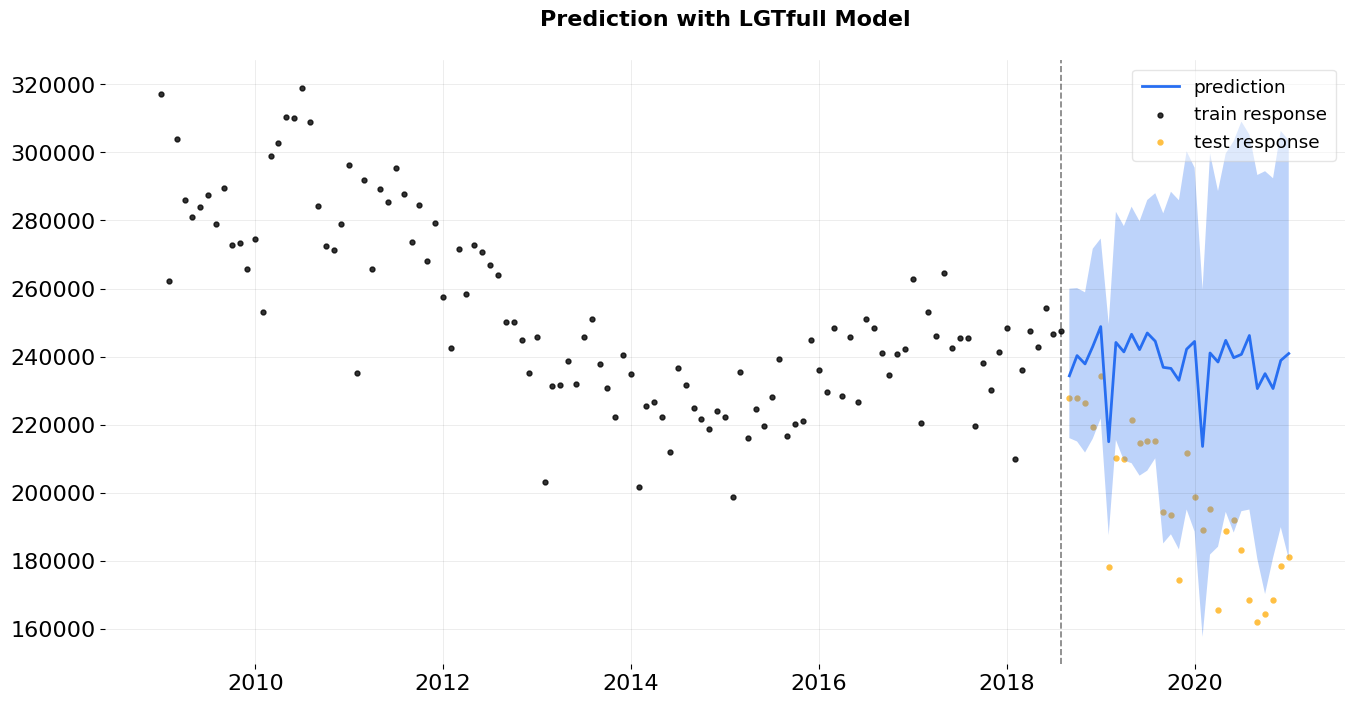

In [48]:
plot_predicted_data(training_actual_df=train1, predicted_df=predictedlgt, 
                        date_col=lgt.date_col, actual_col=lgt.response_col,
                        test_actual_df=test1, title='Prediction with LGTfull Model')

In [49]:
model_LGT_MAE = mean_absolute_error(y1_test, predictedlgt.prediction)
model_LGT_MAE

41680.69819551924

### ETS.

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

### ETS(AAA) (ExponentialSmoothing в sktime)

In [50]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

model_ETSAAA = ExponentialSmoothing(seasonal='multiplicative', sp = 12)
model_ETSAAA.fit(train1.imports_oil_target)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


ExponentialSmoothing(seasonal='multiplicative', sp=12)

In [51]:
pred_ESTAAA = model_ETSAAA.predict(fh= np.arange(1,len(X1_test)+1))

pred_ESTAAA.head()

2018-08-02    238448.982587
2018-08-03    236445.897331
2018-08-04    232409.558620
2018-08-05    234208.127274
2018-08-06    238280.661383
Freq: D, dtype: float64

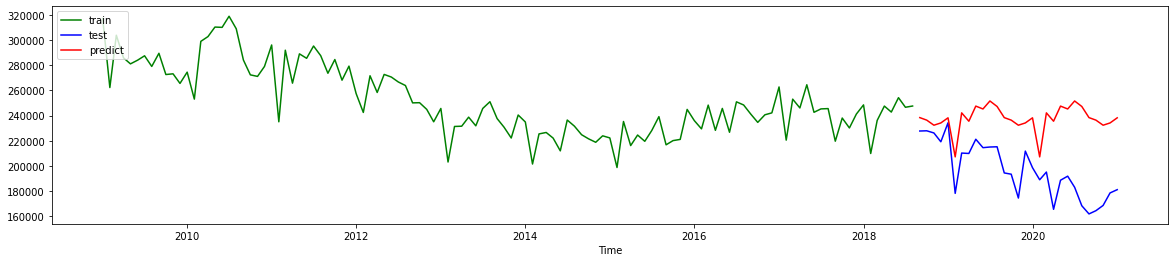

In [52]:
plt.figure(figsize=(20, 4))
plt.plot(X1_train, y1_train, 'g', label = "train")
plt.plot(X1_test, y1_test, 'b', label="test")
plt.plot(X1_test, pred_ESTAAA, 'r', label="predict")

plt.legend(loc="upper left")
plt.xlabel('Time')
plt.show()

In [53]:
model_ESTAAA_MAE = mean_absolute_error(y1_test, pred_ESTAAA)
model_ESTAAA_MAE

40797.872263755795

### ETS с автоматическим выбором по AIC (AutoETS в sktime)


In [55]:
model_ETSAuto = AutoETS(auto=True, sp=12)

model_ETSAuto.fit(train1.imports_oil_target)

AutoETS(auto=True, sp=12)

In [56]:
pred_ESTAuto = model_ETSAuto.predict(fh= np.arange(1,len(X1_test)+1))

pred_ESTAuto.head()

2018-08-02    236987.380810
2018-08-03    236213.076228
2018-08-04    232790.482555
2018-08-05    240392.345860
2018-08-06    243696.946088
Freq: D, dtype: float64

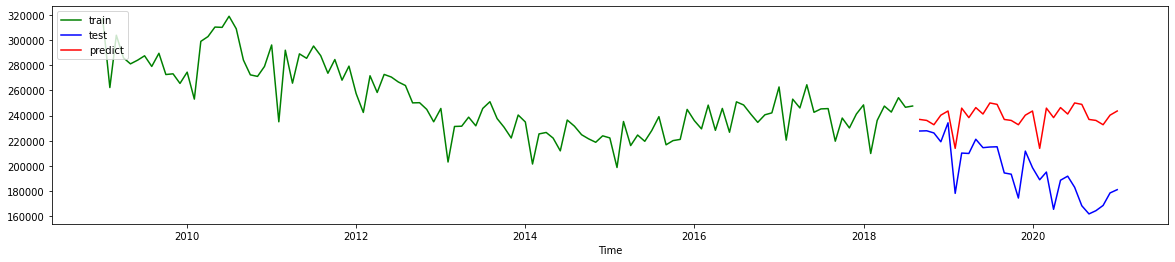

In [57]:
plt.figure(figsize=(20, 4))
plt.plot(X1_train, y1_train, 'g', label = "train")
plt.plot(X1_test, y1_test, 'b', label="test")
plt.plot(X1_test, pred_ESTAuto, 'r', label="predict")

plt.legend(loc="upper left")
plt.xlabel('Time')
plt.show()

In [58]:
model_ESTAuto_MAE = mean_absolute_error(y1_test, pred_ESTAuto)
model_ESTAuto_MAE

42435.13538955967

Лучшей оказалась модель ETS(AAA), которую мы строили в конце

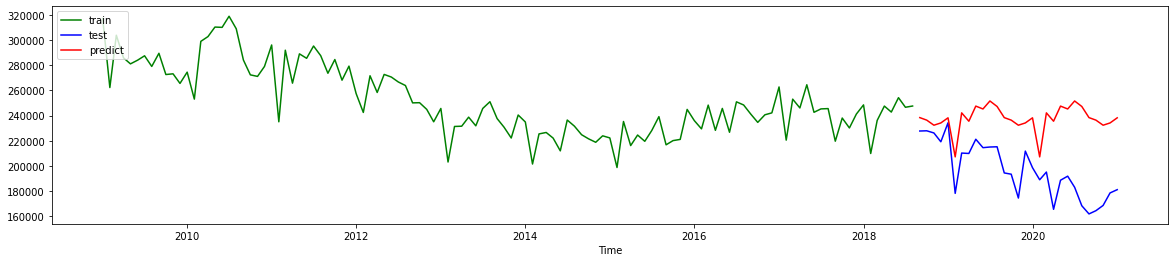

In [59]:
plt.figure(figsize=(20, 4))
plt.plot(X1_train, y1_train, 'g', label = "train")
plt.plot(X1_test, y1_test, 'b', label="test")
plt.plot(X1_test, pred_ESTAAA, 'r', label="predict")

plt.legend(loc="upper left")
plt.xlabel('Time')
plt.show()